In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

from keras.datasets import mnist, cifar10

import pandas as pd
from matplotlib import pyplot as plt

from IPython.display import clear_output
import tensorflow
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(len(y_train))
print(len(y_test))

60000
10000


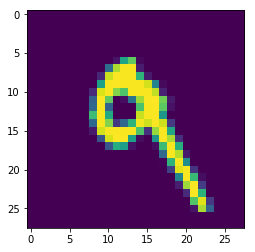

Continue...l


KeyboardInterrupt: 

In [31]:
for i in range(10):
    plt.imshow(x_test[i]);
    plt.show()
    input('Continue...')
    clear_output()

In [107]:
(_, y_train_d), (_, y_test_d) = mnist.load_data()

In [53]:
x_test.shape

(10000, 784)

In [3]:
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

In [4]:
n_classes = 10 #количество классов

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [134]:
#Построение нейросетевой модели
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu')) #скрытый слой
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [128]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_42 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [27]:
seed = 42
import random
random.seed(seed)
np.random.seed(seed)

from tensorflow import set_random_seed
set_random_seed(seed)

ImportError: cannot import name 'set_random_seed' from 'tensorflow' (F:\Anaconda\lib\site-packages\tensorflow\__init__.py)

In [135]:
%%time
model.fit(x_train, y_train,o
          epochs=50,
          batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 44us/step - loss: 6.7338 - acc: 0.5766 - val_loss: 5.7015 - val_acc: 0.6423
Epoch 2/50
48000/48000 [==============================] - 2s 33us/step - loss: 4.7093 - acc: 0.7037 - val_loss: 4.3248 - val_acc: 0.7274
Epoch 3/50
48000/48000 [==============================] - 2s 34us/step - loss: 4.1962 - acc: 0.7367 - val_loss: 4.1540 - val_acc: 0.7388
Epoch 4/50
48000/48000 [==============================] - 2s 33us/step - loss: 4.0635 - acc: 0.7448 - val_loss: 3.9962 - val_acc: 0.7493
Epoch 5/50
48000/48000 [==============================] - 2s 33us/step - loss: 3.9648 - acc: 0.7512 - val_loss: 3.9669 - val_acc: 0.7519
Epoch 6/50
48000/48000 [==============================] - 2s 33us/step - loss: 3.8070 - acc: 0.7611 - val_loss: 2.8048 - val_acc: 0.8212
Epoch 7/50
48000/48000 [==============================] - 2s 32us/step - loss: 2.7395 - acc: 0.8266 - val_loss: 2.5400 - val_acc

KeyboardInterrupt: 

In [136]:
#Построение нейросетевой модели
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='sigmoid')) #скрытый слой
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
x_train_sig = (x_train - x_train.mean()) / x_train.std()

In [142]:
x_train_sig.max()

2.821543345689335

In [143]:
%%time
model.fit(x_train_sig, y_train,
          epochs=50,
          batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.1165 - acc: 0.9648 - val_loss: 0.1218 - val_acc: 0.9636
Epoch 2/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.0902 - acc: 0.9727 - val_loss: 0.1139 - val_acc: 0.9673
Epoch 3/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.0816 - acc: 0.9755 - val_loss: 0.1122 - val_acc: 0.9667
Epoch 4/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.0729 - acc: 0.9783 - val_loss: 0.1151 - val_acc: 0.9666
Epoch 5/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.0662 - acc: 0.9803 - val_loss: 0.1049 - val_acc: 0.9696
Epoch 6/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.0595 - acc: 0.9829 - val_loss: 0.1030 - val_acc: 0.9691
Epoch 7/50
48000/48000 [==============================] - 1s 30us/step - loss: 0.0527 - acc: 0.9851 - val_loss: 0.1004 - val_acc

CIFAR PART AND CONV NETS

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 439s 3us/step


In [11]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
type(x_test)

numpy.ndarray

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
# x_train = np.reshape(x_train, (len(x_train), 32*32*3))
# x_test = np.reshape(x_test, (len(x_test), 32*32*3))

n_classes = 10 #количество классов

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [163]:
x_train_sig = (x_train - x_train.mean()) / x_train.std()

In [8]:
#Построение нейросетевой модели
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation='relu')) #скрытый слой
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%time
model.fit(x_train_sig, y_train,
          epochs=50,
          batch_size=128, validation_split=0.2)

NameError: name 'x_train_sig' is not defined

In [34]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [176]:
x_train.shape

(50000, 32, 32, 3)

In [35]:
#Построение нейросетевой модели
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)         

In [37]:
%%time
model.fit(x_train, y_train,
          epochs=10,
          batch_size=256, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 68s 2ms/step - loss: 2.2724 - accuracy: 0.1658 - val_loss: 2.1328 - val_accuracy: 0.2038
Epoch 2/10
40000/40000 [==============================] - 67s 2ms/step - loss: 1.9934 - accuracy: 0.2607 - val_loss: 2.0193 - val_accuracy: 0.2698
Epoch 3/10
40000/40000 [==============================] - 68s 2ms/step - loss: 1.7271 - accuracy: 0.3377 - val_loss: 1.7826 - val_accuracy: 0.3464
Epoch 4/10
40000/40000 [==============================] - 68s 2ms/step - loss: 1.4915 - accuracy: 0.4526 - val_loss: 2.1349 - val_accuracy: 0.3457
Epoch 5/10
40000/40000 [==============================] - 67s 2ms/step - loss: 1.3638 - accuracy: 0.5023 - val_loss: 2.1751 - val_accuracy: 0.3707
Epoch 6/10
40000/40000 [==============================] - 68s 2ms/step - loss: 1.2814 - accuracy: 0.5351 - val_loss: 2.0852 - val_accuracy: 0.3932
Epoch 7/10
40000/40000 [==============================] - 68s 2ms/st

In [38]:
score = model.evaluate(x_test, y_test, batch_size=256)
print(score)

# model.add(Flatten())

10000/10000 [==============================] - 4s 412us/step
[1.8416384418487548, 0.4742000102996826]


In [40]:
from keras.applications import VGG16

In [43]:
image_size = 224
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size,3))

model = Sequantial()

model.add(vgg_conv)
mode.add(Flatten())

NameError: name 'Sequantial' is not defined